In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer

In [12]:
ps = pd.read_csv('./post_secondary.csv')

In [22]:
ps.drop('Unnamed: 0', axis = 1, inplace = True)

In [23]:
def KNNimpute_DF(df):
    #filling in missing values with knn imputer
    imputer_knn = KNNImputer(n_neighbors = 10)
    imputer_knn.fit(df)

    x = imputer_knn.transform(df)
    
    #casting the numpy array to dataframe
    df = pd.DataFrame(x)
    return df

In [24]:
def round_ordinals(x):
    ordinal_feature_list = ['literacy_home','risk_factors','aspired_occ_b','sports','by_xcurr',
                    'homework','hedonics_b','hours_working_b','edu_confidence',
                    'aspired_occ_1','math_status_1','hs_gpa','f1_xcurr','hours_working_1',
                    'hedonics_1','hs_ac_load', 'testing','academic_p','graduated_Y']
    
    for k in ordinal_feature_list:
        x[k] = x.loc[:,k].apply(round)
    return x

In [25]:
def create_exploratory_set(df):   
    z = KNNimpute_DF(df)  
    rename_list = list(df.columns)
    z.columns = rename_list
    round_ordinals(z)    
    return z

In [26]:
exp = create_exploratory_set(ps)

In [27]:
exp.head()

literacy_home  risk_factors  aspired_occ_b  math_b  reading_b  math_conf_b  \
0              0             2             -1   52.11      59.53       -1.118   
1              3             0              9   57.65      56.70        1.533   
2              2             1             10   66.44      64.46       -0.154   
3              1             1             10   44.68      48.69        1.030   
4              1             2             16   40.57      33.53        0.121   

   verbal_confidence  writing  sports  by_xcurr  ...  ps_level  graduated_Y  \
0             -0.633    1.191       0         1  ...       2.0            0   
1              0.331    1.191       0         3  ...       1.0            1   
2             -0.933    0.996       0         2  ...       1.0            1   
3              1.146   -0.137       1         0  ...       2.0            0   
4              0.143   -0.435       0         0  ...       2.0            0   

   effort  testing  v_facility  m_facility  academic_p  \
0     9.0      161       59.53      248.00           9   
1     9.0      175      226.80      363.84          18   
2    20.7      195      193.38      385.56          50   
3    15.0      139       97.38      182.36          15   
4    14.0      113       67.06      193.95           0   

   iq_by_concientiousness  delinquency  wages_cont  
0                2767.770       6.9930    644960.0  
1                5315.760       0.0000    524970.0  
2               10861.843       1.6225   7220920.0  
3                4196.100       2.5013    208440.0  
4                3654.140      10.0480   5418720.0  

[5 rows x 33 columns]

In [83]:
exp.graduated_Y.value_counts(normalize = True)

1    0.55156
0    0.44844
Name: graduated_Y, dtype: float64

In [29]:
coll_t = exp[exp.ps_level == 1]
coll_y = coll_t[(coll_t.graduated_Y == 1)]
coll_n = coll_t[(coll_t.graduated_Y == 0)]

comm_t = exp[exp.ps_level == 2]
comm_y = comm_t[(comm_t.graduated_Y == 1)]
comm_n = comm_t[(comm_t.graduated_Y == 0)]

trade_t = exp[exp.ps_level == 3]
trade_y = trade_t[(trade_t.graduated_Y == 1)]
trade_n = trade_t[(trade_t.graduated_Y == 0)]

print(f'4 yr college graduated: {coll_y.shape[0]}, dropped out: {coll_n.shape[0]}, total: {coll_t.shape[0]}\n',
      f'community college graduated: {comm_y.shape[0]}, dropped out:{comm_n.shape[0]}, total: {comm_t.shape[0]}\n',
      f'trade school graduated: {trade_y.shape[0]}, dropped out:  {trade_n.shape[0]}, total:  {trade_t.shape[0]}\n')


4 yr college graduated: 3714, dropped out: 2377, total: 6091
 community college graduated: 1324, dropped out:1926, total: 3250
 trade school graduated: 154, dropped out:  137, total:  291



In [30]:
comm_coll = pd.concat([coll_n,comm_y])   

In [31]:
exp.hedonics_b.value_counts()

3    2314
2    1786
4    1595
1    1266
5     922
8     829
0     613
6     390
7     186
Name: hedonics_b, dtype: int64

In [32]:
print(f'standardized testing mean entire 4yr collge cohort is: {round(coll_t.testing.mean(),2)}')
print(f'standardized testing mean for collge graduates is:  {round(coll_y.testing.mean(),2)}')
print(f'standardized testing mean for collge dropouts is:  {round(coll_n.testing.mean(),2)}\n')

print(f'standardized testing mean for the entire community collge cohort is:  {round(comm_t.testing.mean(),2)}')
print(f'standardized testing mean for community collge graduates is: {round(comm_y.testing.mean(),2)}')
print(f'standardized testing mean for community collge dropouts is:  {round(comm_n.testing.mean(),2)}\n')

print(f'standardized testing mean for the entire trade school cohort graduates is: {round(trade_t.testing.mean(),2)}')
print(f'standardized testing mean for trade school graduates is:  {round(trade_y.testing.mean(),2)}')
print(f'standardized testing mean for trade school dropouts is: {round(trade_n.testing.mean(),2)}\n')


standardized testing mean entire 4yr collge cohort is: 167.05
standardized testing mean for collge graduates is:  169.97
standardized testing mean for collge dropouts is:  162.48

standardized testing mean for the entire community collge cohort is:  144.5
standardized testing mean for community collge graduates is: 146.47
standardized testing mean for community collge dropouts is:  143.15

standardized testing mean for the entire trade school cohort graduates is: 132.75
standardized testing mean for trade school graduates is:  132.79
standardized testing mean for trade school dropouts is: 132.7



In [33]:
print(f'mean wages for 4yr college graduates: {round(coll_y.wages_cont.mean())}')
print(f'mean wages for 4yr college drop outs: {round(coll_n.wages_cont.mean())}')
print(f'mean wages for commmunity college graduates: {round(comm_y.wages_cont.mean())}')
print(f'mean wages for community college drop outs: {round(comm_n.wages_cont.mean())}')

mean wages for 4yr college graduates: 5844351.0
mean wages for 4yr college drop outs: 4007892.0
mean wages for commmunity college graduates: 3919831.0
mean wages for community college drop outs: 3097513.0


/Users/eonjamesslemp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


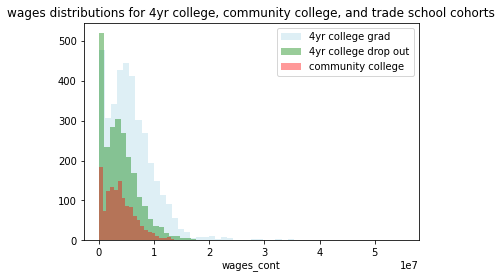

In [34]:
sns.distplot(coll_y['wages_cont'],  hist = True, kde=False, color = 'lightblue',label='4yr college grad')
sns.distplot(coll_n['wages_cont'],  hist = True, kde=False, color = 'green', label='4yr college drop out')
sns.distplot(comm_y['wages_cont'],  hist = True, kde=False, color = 'red',label='community college grad')
plt.title('wages distributions for 4yr college, community college, and trade school cohorts')
plt.legend(['4yr college grad','4yr college drop out','community college'])
plt.show()

/Users/eonjamesslemp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


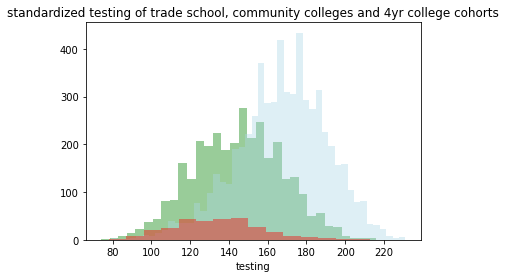

In [35]:
p = comm_t[comm_t.testing > 0]
q = coll_t[coll_t.testing > 0]
r = trade_t[trade_t.testing > 0]
sns.distplot(p['testing'],  hist = True, kde=False, color = 'green',label='yes')
sns.distplot(q['testing'],  hist = True, kde=False, color = 'lightblue', label='tot')
sns.distplot(r['testing'],  hist = True, kde=False, color = 'red',label='no')
plt.title('standardized testing of trade school, community colleges and 4yr college cohorts')
plt.show()

/Users/eonjamesslemp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


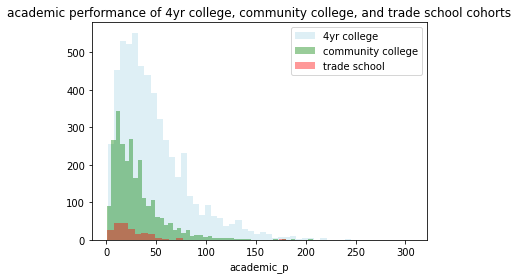

In [45]:
p = comm_t[(comm_t.academic_p > 0) & (comm_t.academic_p < 400)]
q = coll_t[(coll_t.academic_p > 0) & (coll_t.academic_p < 400)]
r = trade_t[(trade_t.academic_p > 0) & (trade_t.academic_p < 400)]

sns.distplot(q['academic_p'],  hist = True, kde=False,color = 'lightblue', label='tot')
sns.distplot(p['academic_p'],  hist = True, kde=False,color = 'green',label='yes')
sns.distplot(r['academic_p'],  hist = True, kde=False,color = 'red',label='no')
plt.title('academic performance of 4yr college, community college, and trade school cohorts')
plt.legend(['4yr college', 'community college','trade school'])
plt.show()

/Users/eonjamesslemp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


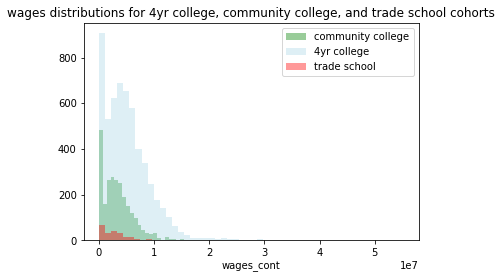

In [46]:
sns.distplot(p['wages_cont'],  hist = True, kde=False, color = 'green',label='community college grad')
sns.distplot(q['wages_cont'],  hist = True, kde=False, color = 'lightblue', label='4yr college grad')
sns.distplot(r['wages_cont'],  hist = True, kde=False, color = 'red',label='trade school grad')
plt.title('wages distributions for 4yr college, community college, and trade school cohorts')
plt.legend(['community college','4yr college','trade school'])
plt.show()

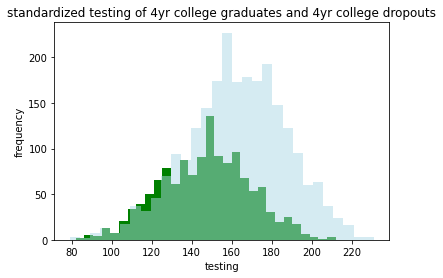

In [47]:
plt.hist(comm_y.testing, alpha=1, bins=30, color='green')
plt.hist(coll_n.testing, alpha=.5, bins=30, color='lightblue')
plt.title('standardized testing of commuity collegs graduates vs dropouts')
plt.ylabel('frequency')
plt.xlabel('testing')
plt.savefig('testing2.png', bbox_inches='tight')
plt.title('standardized testing of 4yr college graduates and 4yr college dropouts')
plt.show()

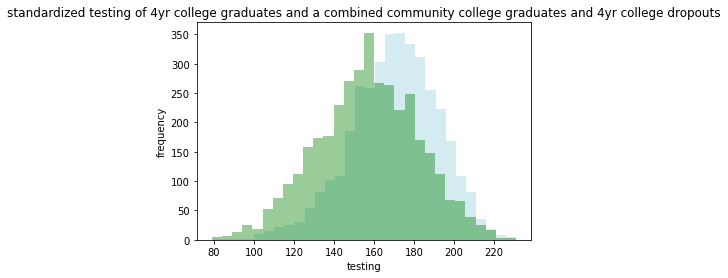

In [48]:
plt.hist(coll_y.testing, alpha=.5, bins=30, color='lightblue')
plt.hist(comm_coll.testing, alpha=.4, bins=30, color='green')
plt.title('standardized testing of commuity collegs graduates vs dropouts')
plt.ylabel('frequency')
plt.xlabel('testing')
plt.savefig('testing2.png', bbox_inches='tight')
plt.title('standardized testing of 4yr college graduates and a combined community college graduates and 4yr college dropouts')
plt.show()

In [ ]:

plt.hist(comm_y.wages_cont, alpha=1, bins=40, color='green')
plt.hist(coll_n.wages_cont, alpha=.5, bins=40, color='lightblue')
plt.title('standardized testing of commuity collegs graduates vs dropouts')
plt.ylabel('frequency')
plt.xlabel('wages')
plt.savefig('testing2.png', bbox_inches='tight')
plt.title('wages distribution of 4yr college dropouts and community college graduates')
plt.show()

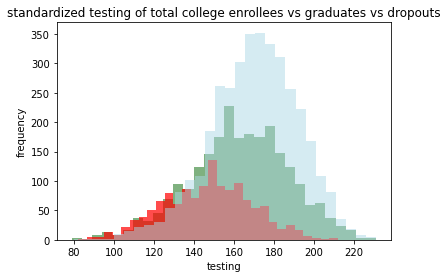

In [49]:
plt.hist(coll_n.testing, alpha=0.5, bins=30, color='darkgreen')
plt.hist(comm_y.testing, alpha=.7, bins=30, color='red')
plt.hist(coll_y.testing, alpha=0.5, bins=30, color='lightblue')

plt.title('standardized testing of total college enrollees vs graduates vs dropouts')
plt.ylabel('frequency')
plt.xlabel('testing')
plt.savefig('testing2.png', bbox_inches='tight')

plt.show()

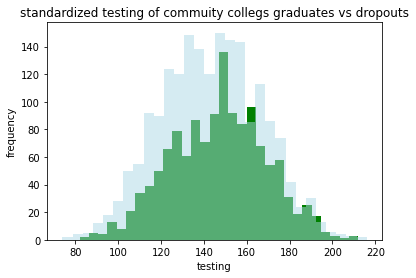

In [51]:
plt.hist(comm_y.testing, alpha=1, bins=30, color='green')
plt.hist(comm_n.testing, alpha=.5, bins=30, color='lightblue')
plt.title('standardized testing of commuity collegs graduates vs dropouts')
plt.ylabel('frequency')
plt.xlabel('testing')
plt.savefig('testing2.png', bbox_inches='tight')

plt.show()

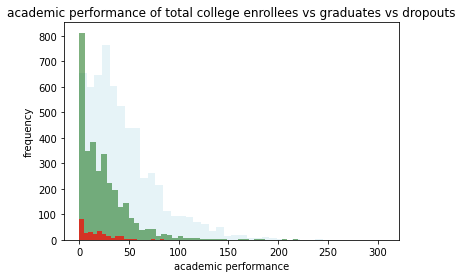

In [50]:
plt.hist(coll_t.academic_p, alpha=0.3, bins=40, color='lightblue')
plt.hist(comm_t.academic_p, alpha=.5, bins=40, color='darkgreen')
plt.hist(trade_t.academic_p, alpha=0.7, bins=40, color='red')
plt.title('academic performance of total college enrollees vs graduates vs dropouts')
plt.ylabel('frequency')
plt.xlabel('academic performance')
plt.savefig('academics.png', bbox_inches='tight')

plt.show()

In [52]:
print(f'college graduate testing: {round(coll_y.testing.mean(),2)}')
print(f'college drop out testing: {round(coll_n.testing.mean(),2)}')
print(f'mean for the entire population is {round(exp.testing.mean(),2)} and the standard deviation is {round(exp.testing.std(),2)}')


college graduate testing: 169.97
college drop out testing: 162.48
mean for the entire population is 158.39 and the standard deviation is 25.52


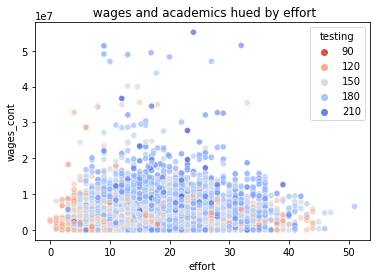

In [54]:
sns.scatterplot(x = 'effort',
                y = 'wages_cont',
                data = exp,
                alpha = .7,
                hue = 'testing',
                palette = 'coolwarm_r'
               )
plt.title(' wages and academics hued by effort')
plt.savefig('scatterwages.png', bbox_inches='tight')
plt.show()

In [55]:
exp.columns

Index(['literacy_home', 'risk_factors', 'aspired_occ_b', 'math_b', 'reading_b',
       'math_conf_b', 'verbal_confidence', 'writing', 'sports', 'by_xcurr',
       'homework', 'hedonics_b', 'hours_working_b', 'edu_confidence',
       'aspired_occ_1', 'math_1', 'math_status_1', 'hs_gpa', 'f1_xcurr',
       'hours_working_1', 'hedonics_1', 'math_conf_1', 'hs_ac_load',
       'ps_level', 'graduated_Y', 'effort', 'testing', 'v_facility',
       'm_facility', 'academic_p', 'iq_by_concientiousness', 'delinquency',
       'wages_cont'],
      dtype='object')

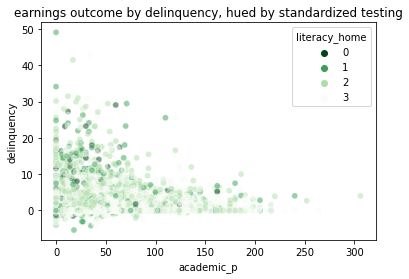

In [93]:
sns.scatterplot(x = 'academic_p', 
                y = 'delinquency',
                data = exp,
                alpha = .5,
                hue = 'literacy_home',
                palette = 'Greens_r'
               )
plt.savefig('dscatterwages.png', bbox_inches='tight')
plt.title('earnings outcome by delinquency, hued by standardized testing')
plt.show()

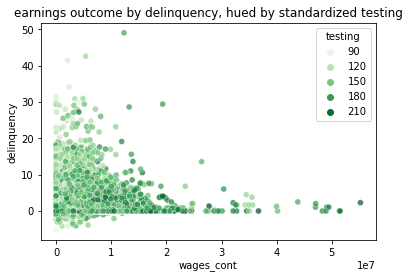

In [91]:
sns.scatterplot(x = 'wages_cont', 
                y = 'delinquency',
                data = exp,
                alpha = .7,
                hue = 'testing',
                palette = 'Greens'
               )
plt.savefig('dscatterwages.png', bbox_inches='tight')
plt.title('earnings outcome by delinquency, hued by standardized testing')
plt.show()

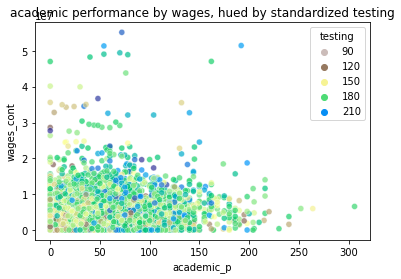

In [58]:
sns.scatterplot(x = 'academic_p', 
                y = 'wages_cont',
                data = exp,
                alpha = .7,
                hue = 'testing',
                palette = 'terrain_r'           
               )
plt.title('academic performance by wages, hued by standardized testing')
plt.show()

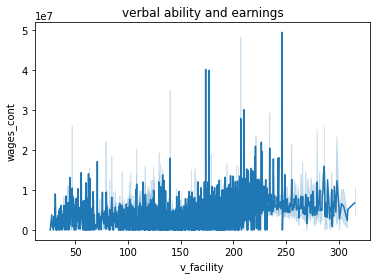

In [59]:
sns.lineplot(x="v_facility", y="wages_cont",data=exp)
plt.title('verbal ability and earnings')
plt.show()

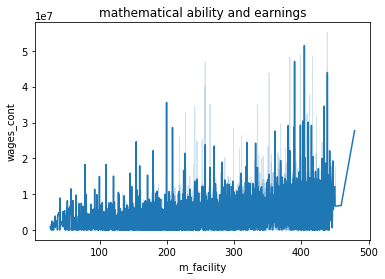

In [60]:
sns.lineplot(x="m_facility", y="wages_cont",data=exp)
plt.title('mathematical ability and earnings')
plt.show()

In [61]:
exp.columns

Index(['literacy_home', 'risk_factors', 'aspired_occ_b', 'math_b', 'reading_b',
       'math_conf_b', 'verbal_confidence', 'writing', 'sports', 'by_xcurr',
       'homework', 'hedonics_b', 'hours_working_b', 'edu_confidence',
       'aspired_occ_1', 'math_1', 'math_status_1', 'hs_gpa', 'f1_xcurr',
       'hours_working_1', 'hedonics_1', 'math_conf_1', 'hs_ac_load',
       'ps_level', 'graduated_Y', 'effort', 'testing', 'v_facility',
       'm_facility', 'academic_p', 'iq_by_concientiousness', 'delinquency',
       'wages_cont'],
      dtype='object')

In [62]:
features = exp[[ 'effort', 'testing', 'v_facility',
       'm_facility', 'academic_p', 'iq_by_concientiousness',
                'delinquency','sports','risk_factors','f1_xcurr','homework',
                'hedonics_1','hs_gpa','hs_ac_load','wages_cont']]



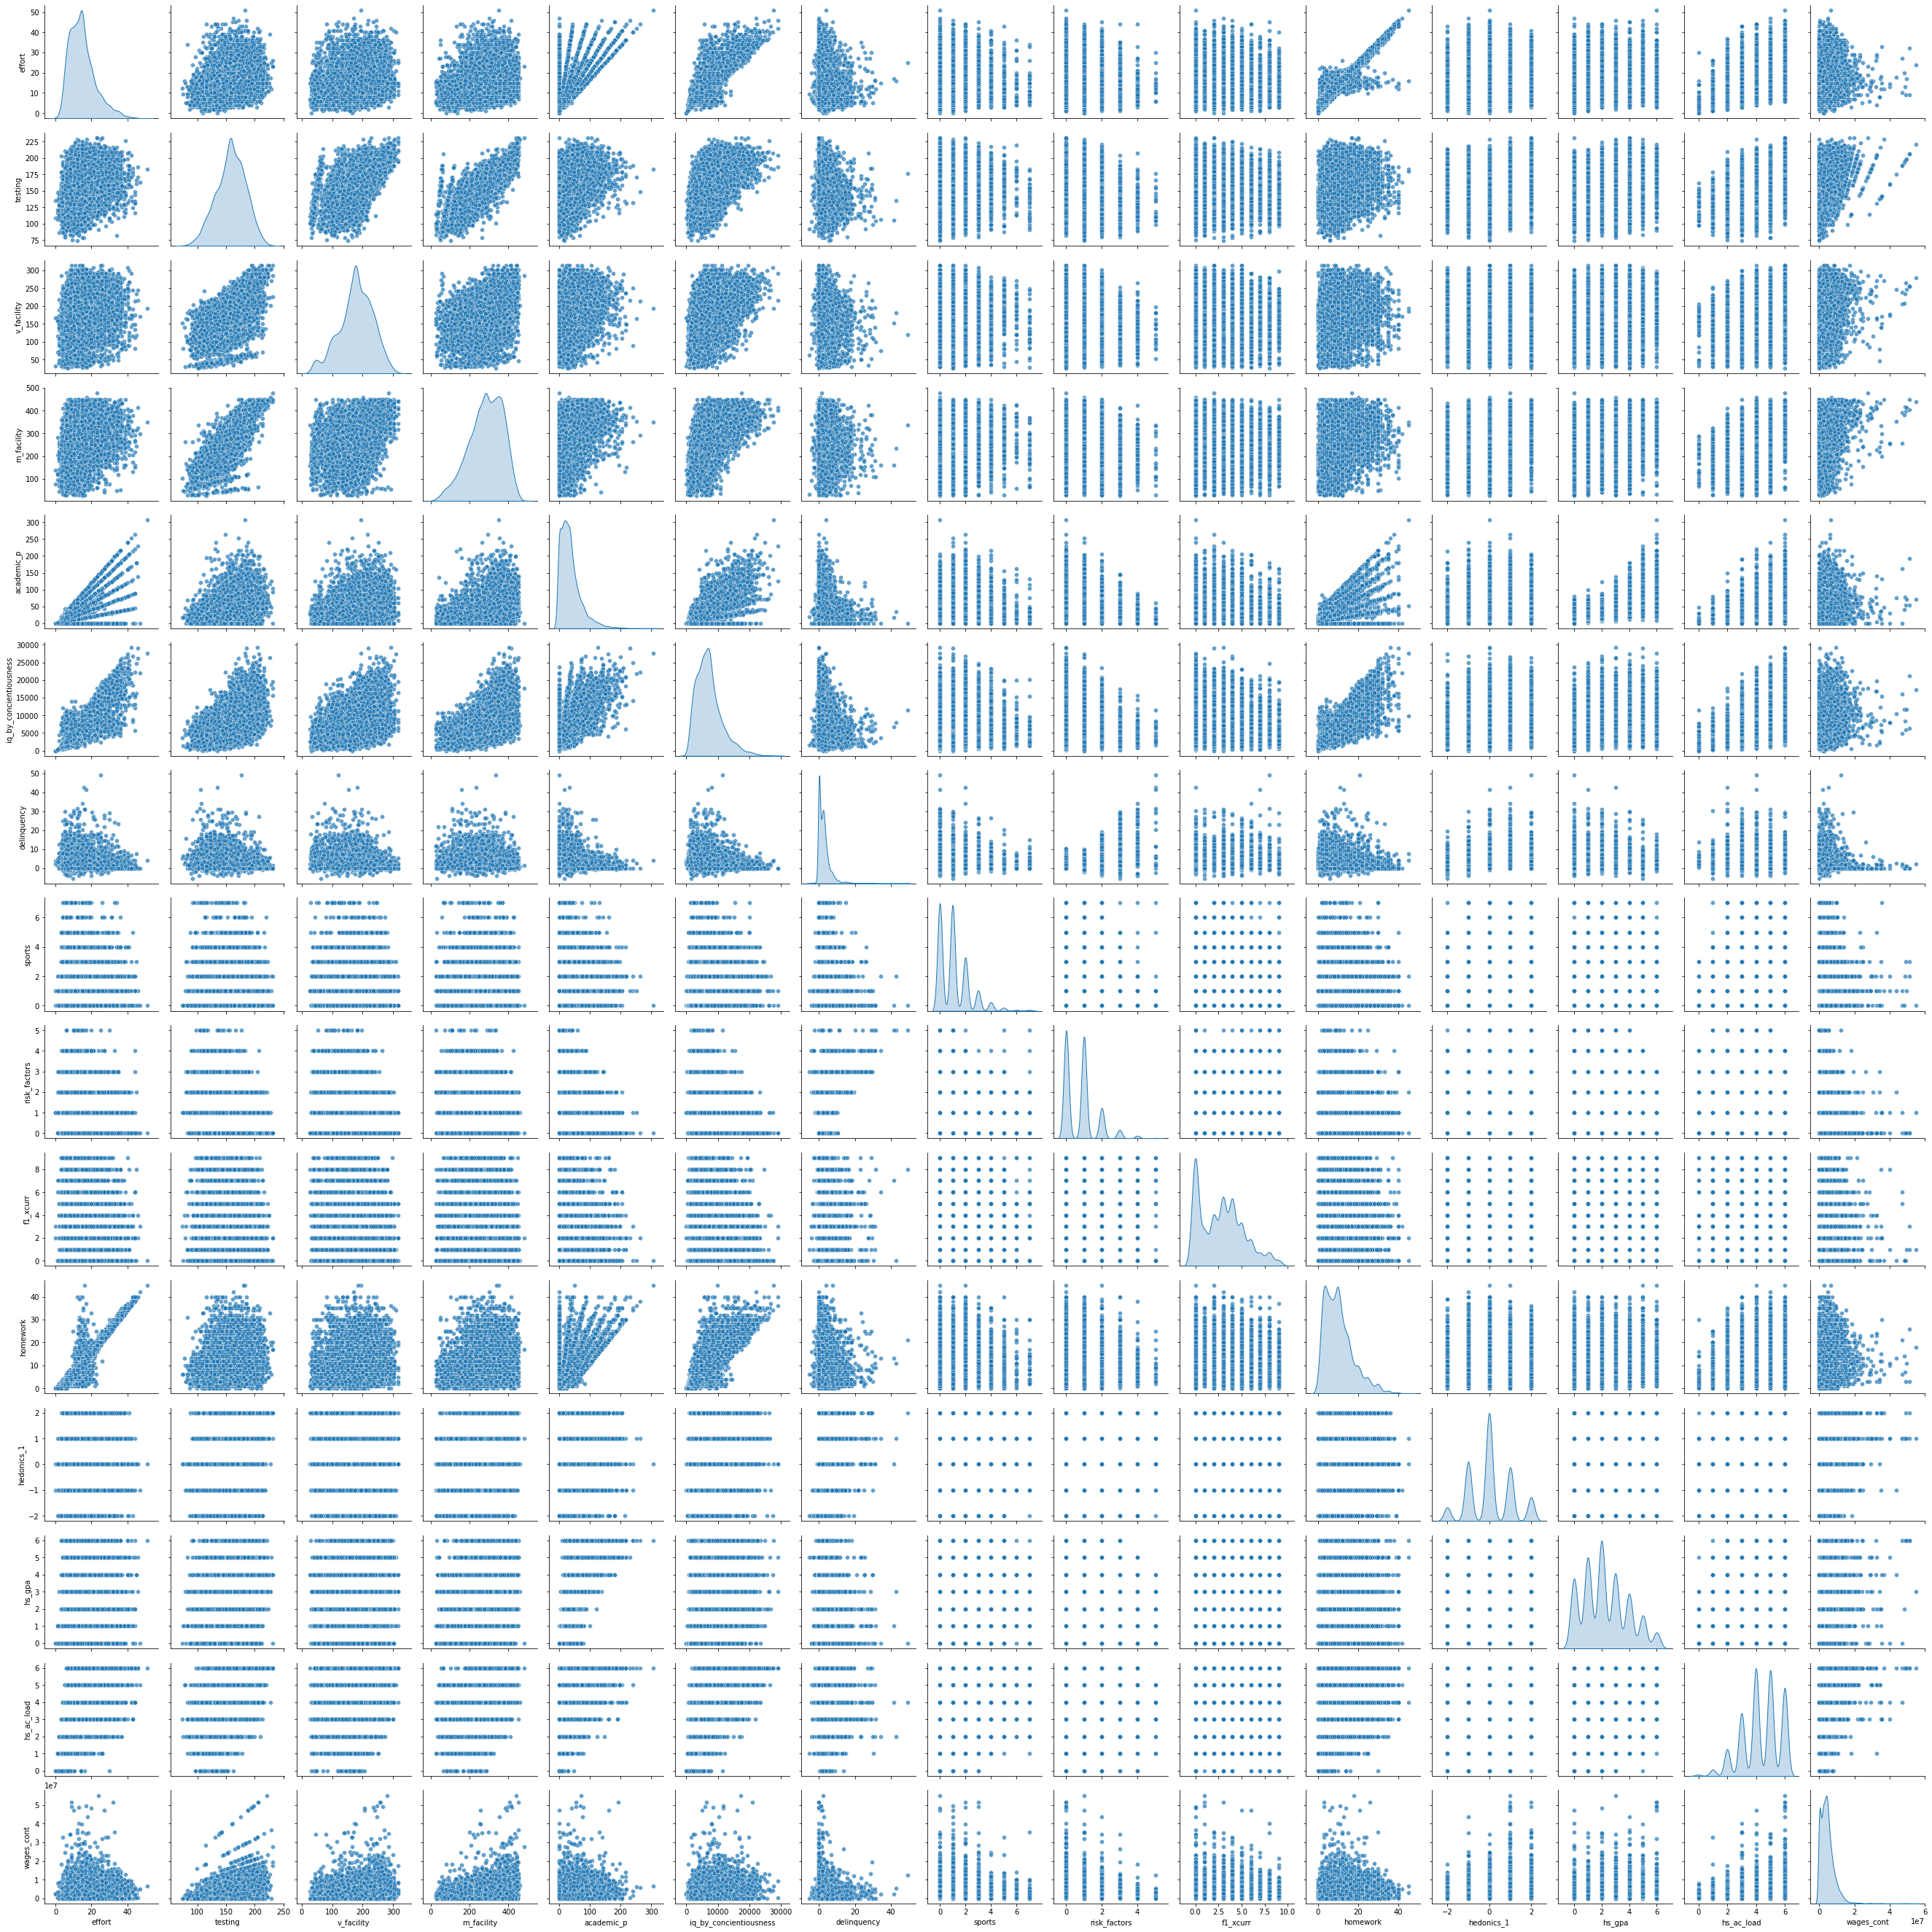

In [63]:
sns.pairplot(features, diag_kind = 'kde', palette= 'coolwarm', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True))

In [65]:
def plotbar(x,y,data, save = False):
    sns.barplot(x = x,
            y = y,
            data = data,
            palette = 'Greens');
    if save == True:
        plt.savefig(f'{x}-{y}-{data}.png', bbox_inches='tight')  
    plt.show()
    return

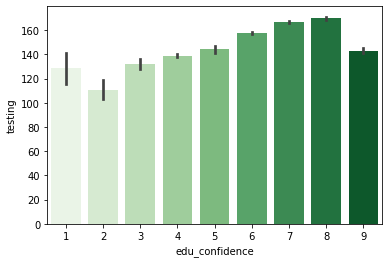

In [66]:
plotbar('edu_confidence','testing',exp)

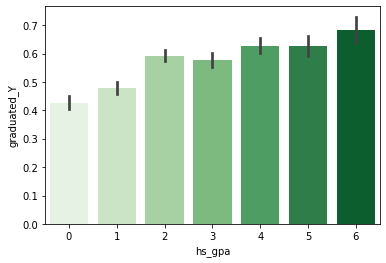

In [67]:
plotbar('hs_gpa','graduated_Y',exp)

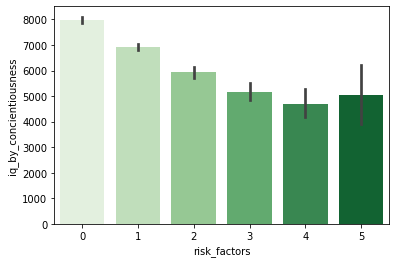

In [68]:
plotbar('risk_factors','iq_by_concientiousness',exp)

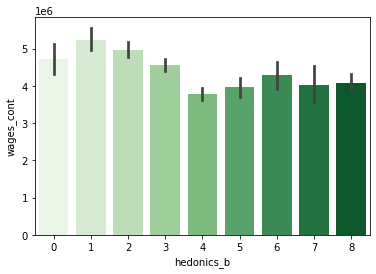

In [69]:
plotbar('hedonics_b','wages_cont',exp)

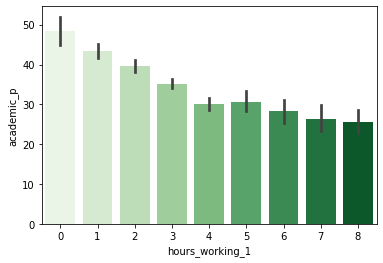

In [70]:
plotbar('hours_working_1','academic_p',exp)

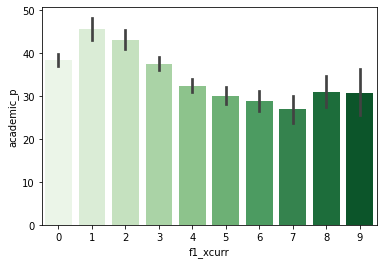

In [71]:
plotbar('f1_xcurr','academic_p',exp)

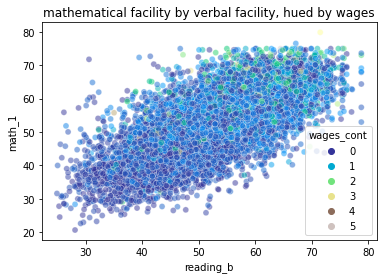

In [72]:
sns.scatterplot(x = 'reading_b', 
                y = 'math_1',
                data = exp,
                alpha = .5,
                hue = 'wages_cont',
                palette = 'terrain'           
               )
plt.title('mathematical facility by verbal facility, hued by wages')
plt.savefig('m_r_conf.png', bbox_inches='tight')
plt.show()

In [73]:
exp.groupby('literacy_home').testing.mean()

literacy_home
0    144.129630
1    152.206039
2    155.207751
3    163.474453
Name: testing, dtype: float64

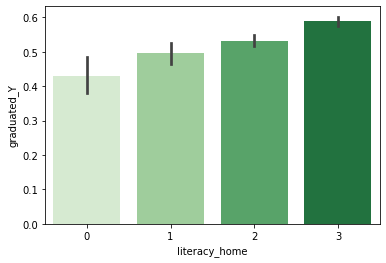

In [99]:
plotbar('literacy_home','graduated_Y',exp)

In [75]:
exp.literacy_home.value_counts()

3    4658
2    3793
1    1126
0     324
Name: literacy_home, dtype: int64

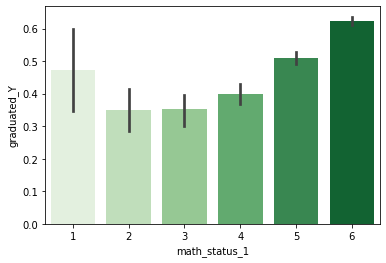

In [96]:
plotbar('math_status_1','graduated_Y',exp)

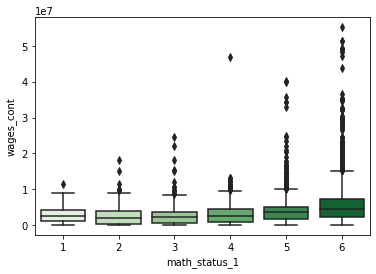

In [77]:
sns.boxplot(x = 'math_status_1', y = 'wages_cont',
           data = exp,
           palette = 'Greens')

plt.savefig('hedoneff.png', bbox_inches='tight')
plt.show()

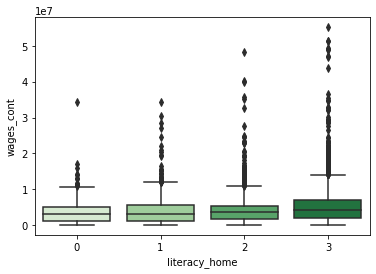

In [78]:
sns.boxplot(x = 'literacy_home', y = 'wages_cont',
           data = exp,
           palette = 'Greens')

plt.savefig('hedoneff.png', bbox_inches='tight')
plt.show()

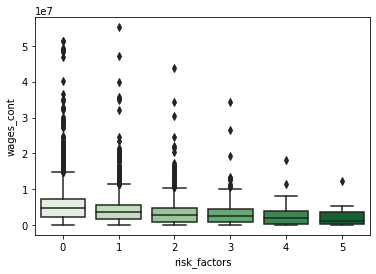

In [79]:
sns.boxplot(x = 'risk_factors', y = 'wages_cont',
           data = exp,
           palette = 'Greens')
plt.savefig('risk.png', bbox_inches='tight')
plt.show()

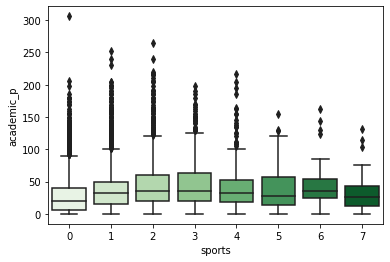

In [80]:
sns.boxplot(x = 'sports', y = 'academic_p',
           data = exp,
           palette = 'Greens')
plt.show()

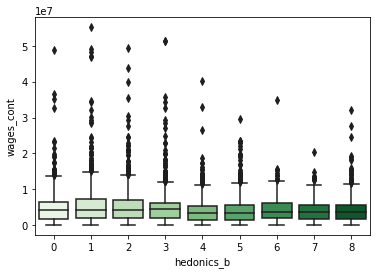

In [81]:
sns.boxplot(x = 'hedonics_b', y = 'wages_cont',
           data = exp,
           palette = 'Greens')
plt.show()